# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities ):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&q={city}&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | yuzhno-kurilsk
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | sergeyevka
Processing Record 8 of Set 1 | san jose village
City not found. Skipping...
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | hirara
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | poltavka
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | happy valley-goose bay
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | lerwick
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 19 of Set 1 | old town
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of S

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,27.53,95,76,1.34,EC,1708156794
1,chonchi,-42.6128,-73.8092,10.56,95,87,0.72,CL,1708156316
2,yuzhno-kurilsk,44.0306,145.8556,-3.68,67,100,1.55,RU,1708156268
3,albany,42.6001,-73.9662,-2.53,75,100,1.34,US,1708155988
4,talnakh,69.4865,88.3972,-30.65,88,90,2.43,RU,1708156207


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,27.53,95,76,1.34,EC,1708156794
1,chonchi,-42.6128,-73.8092,10.56,95,87,0.72,CL,1708156316
2,yuzhno-kurilsk,44.0306,145.8556,-3.68,67,100,1.55,RU,1708156268
3,albany,42.6001,-73.9662,-2.53,75,100,1.34,US,1708155988
4,talnakh,69.4865,88.3972,-30.65,88,90,2.43,RU,1708156207


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

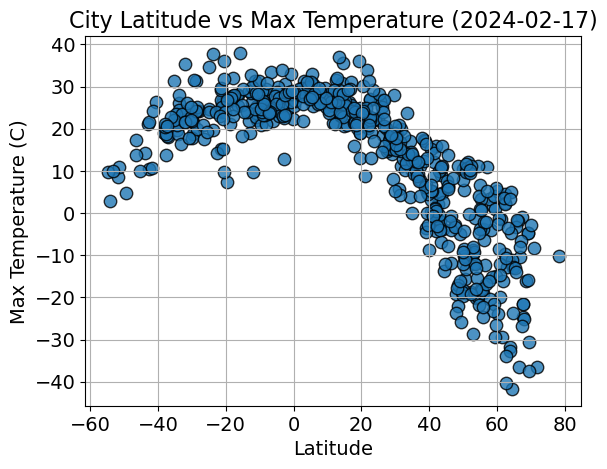

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Max Temperature (C)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

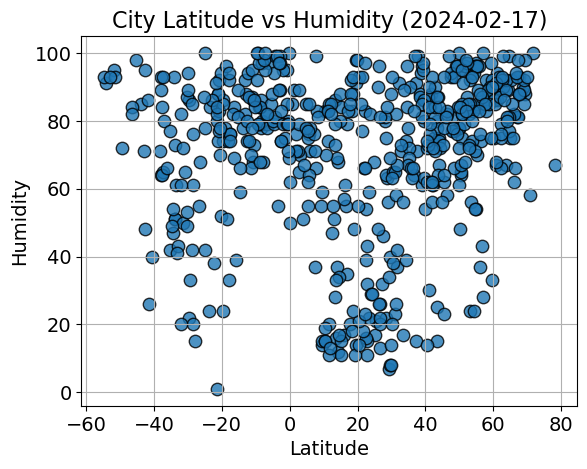

In [47]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Humidity",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

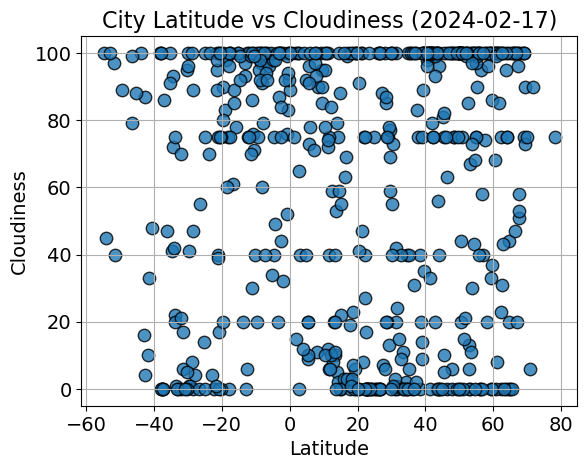

In [48]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Cloudiness",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

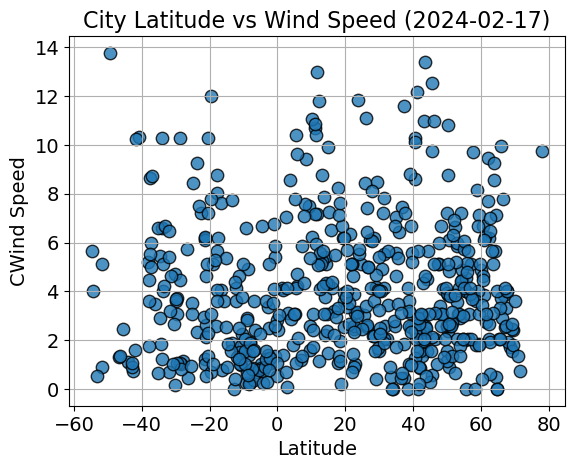

In [49]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("CWind Speed",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def lin_regress(x_values,y_values,xlabel,ylabel,xytext):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(9,7))
    plt.scatter(x_values, y_values, s=80)
    plt.plot(x_values,regress_values,"red",linewidth=2)
    plt.annotate(line_eq,xytext,fontsize=20,color="red")
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.tick_params(labelsize=14)
    print(f'The r-value is:{r_value}')
    plt.show()

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yuzhno-kurilsk,44.0306,145.8556,-3.68,67,100,1.55,RU,1708156268
3,albany,42.6001,-73.9662,-2.53,75,100,1.34,US,1708155988
4,talnakh,69.4865,88.3972,-30.65,88,90,2.43,RU,1708156207
6,sergeyevka,53.8800,67.4158,-20.10,94,30,2.92,KZ,1708156798
8,hirara,24.8000,125.2833,22.15,68,75,5.14,JP,1708156799


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,27.53,95,76,1.34,EC,1708156794
1,chonchi,-42.6128,-73.8092,10.56,95,87,0.72,CL,1708156316
5,lebu,-37.6167,-73.6500,13.86,84,0,8.66,CL,1708156797
7,port-aux-francais,-49.3500,70.2167,4.85,72,89,13.77,TF,1708156799
13,atafu village,-8.5421,-172.5159,28.48,78,100,4.91,TK,1708156210


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8606488711990203


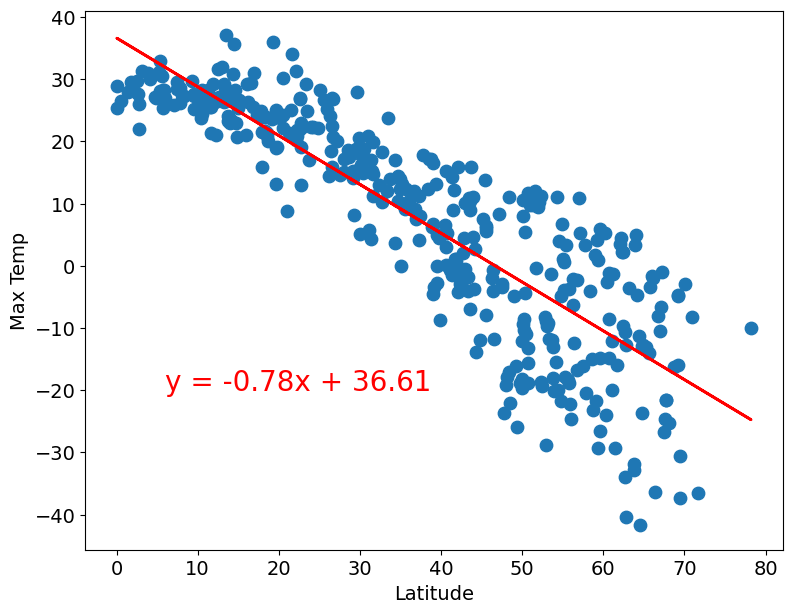

In [53]:
# Linear regression on Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Max Temp"],xlabel = "Latitude",
            ylabel = "Max Temp",xytext = (6,-20))

The r-value is:0.539440050007052


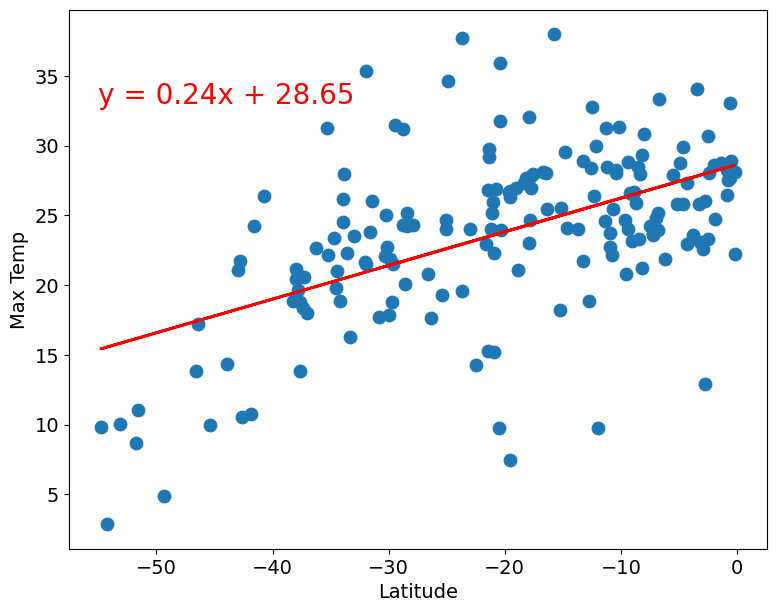

In [54]:
# Linear regression on Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Max Temp"],xlabel = "Latitude",
            ylabel = "Max Temp",xytext = (-55,33))

**Discussion about the linear relationship:**
 Since the r-value is negative, it indicates a negative correlation between temperature and latitude in the northern hemisphere.
Specifically, it suggests that as latitude increases (moving away from the equator), temperature tends to decrease.
The magnitude of the r-value (-0.876) suggests a relatively strong negative linear relationship between temperature and latitude in the northern hemisphere.
Since the r-value is positive, it indicates a positive correlation between temperature and latitude in the southern hemisphere.
Specifically, it suggests that as latitude increases (moving towards the equator), temperature tends to increase.
The magnitude of the r-value (0.615) suggests a moderately strong positive linear relationship between temperature and latitude in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.3885015554302512


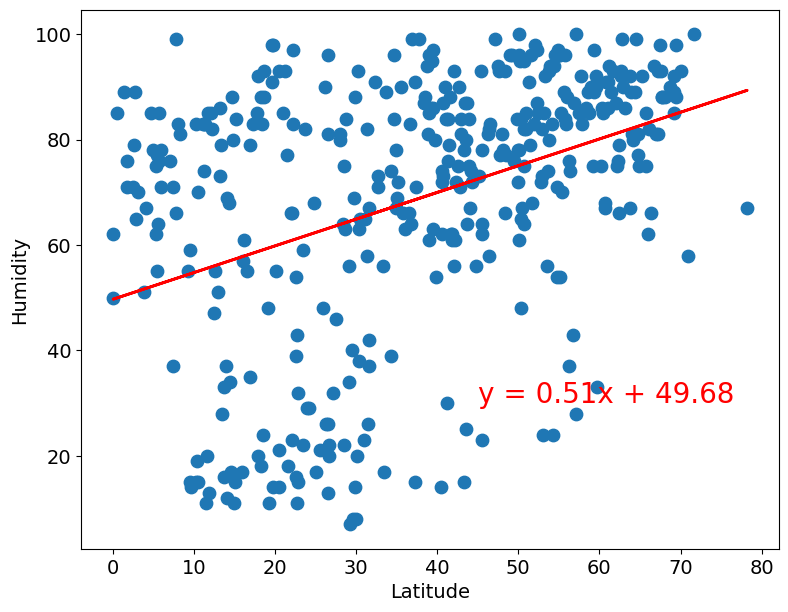

In [55]:
# Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Humidity"],xlabel = "Latitude",
            ylabel = "Humidity",xytext = (45,30))

The r-value is:0.2588070360597987


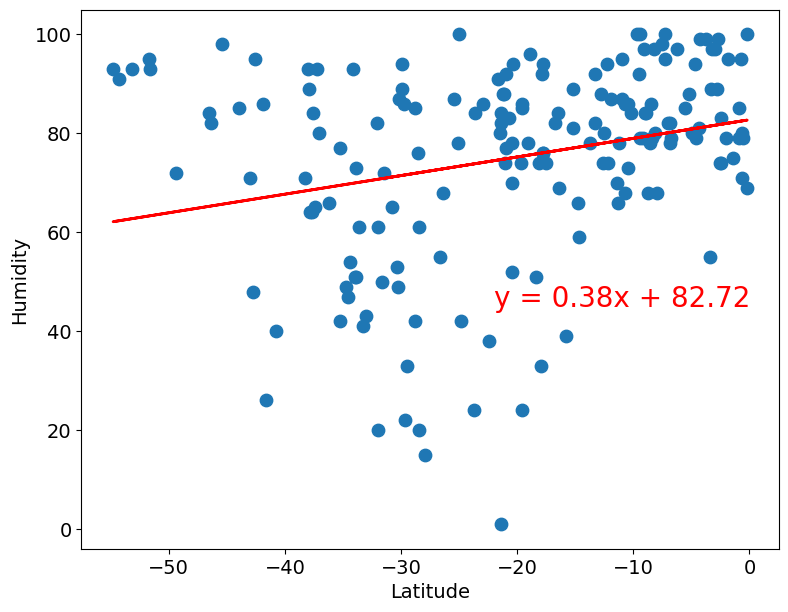

In [56]:
# Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Humidity"],xlabel = "Latitude",
            ylabel = "Humidity",xytext = (-22,45))

**Discussion about the linear relationship:** Since the r-values for northern and southern hemisphere is positive, it indicates a positive correlation between humidity and latitude.Specifically, it suggests that as latitude increases (moving towards the equator), humidity tends to increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.17069746202963232


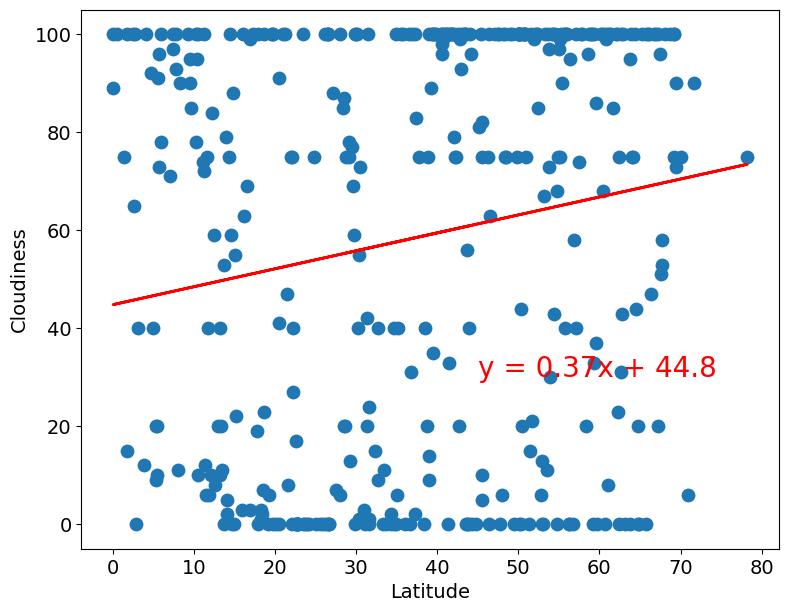

In [57]:
# Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Cloudiness"],xlabel = "Latitude",
            ylabel = "Cloudiness",xytext = (45,30))

The r-value is:0.3178439374115188


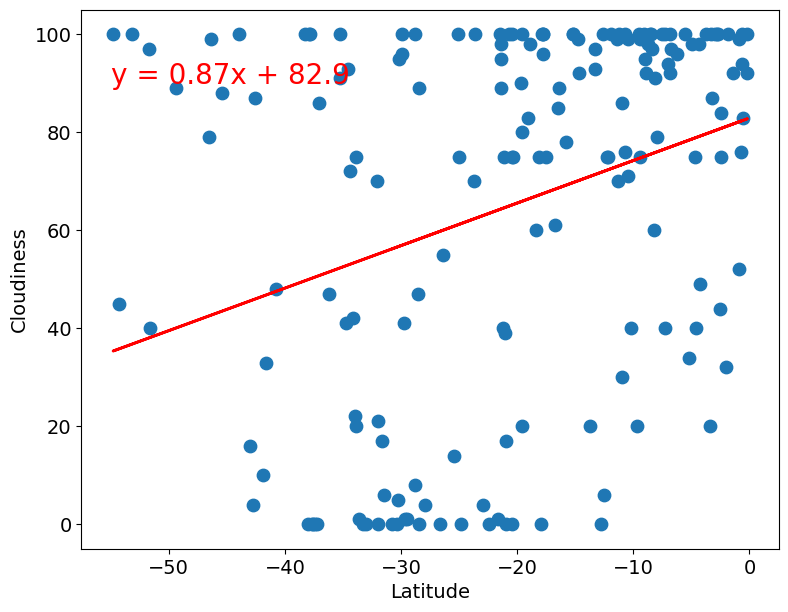

In [58]:
# Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Cloudiness"],xlabel = "Latitude",
            ylabel = "Cloudiness",xytext = (-55,90))

**Discussion about the linear relationship:** 
In both the northern and southern hemispheres, there is a weak positive linear relationship between cloudiness and latitude. This means that cloudiness tends to increase as latitude increases, regardless of the hemisphere.
However, the strength of this relationship is very weak to weak, as indicated by the magnitude of the r-values being close to zero or less than 0.5.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.10377073814187293


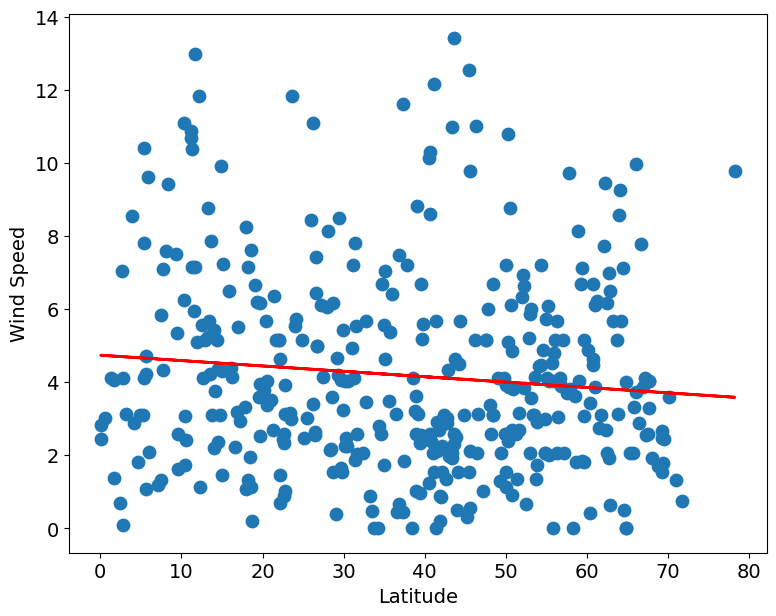

In [59]:
# Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Wind Speed"],xlabel = "Latitude",
            ylabel = "Wind Speed",xytext = (5,17))

The r-value is:-0.25892963445971057


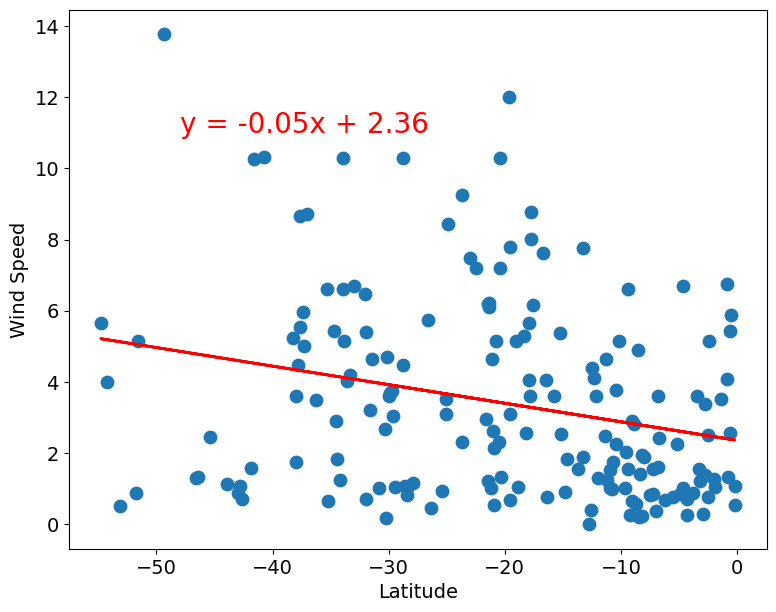

In [60]:
# Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Wind Speed"],xlabel = "Latitude",
            ylabel = "Wind Speed",xytext = (-48,11))

**Discussion about the linear relationship:** 
In both the northern and southern hemispheres, there is a weak negative linear relationship between windspeed and latitude. This means that windspeed tends to decrease as latitude increases, regardless of the hemisphere.
However, the strength of this relationship is very weak to weak, as indicated by the magnitude of the r-values being close to zero or less than 0.5.